In [1]:
# Importing necessary libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical calculations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualization
from scipy import stats  # Statistical analysis


In [2]:
file_path = "C:/Users/HP/apple_quality.csv"
df = pd.read_csv(file_path)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
# Convert the 'Acidity' column to numerical
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [6]:
# Generate statistical summary of the dataset
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [7]:
# Select numerical columns excluding ID
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('A_id')  # Removing ID column if present
df_numerical = df[numerical_columns]

# Display the first few rows of numerical data
df_numerical.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [37]:
df = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness','Ripeness', 'Acidity']

ds = pd.DataFrame({
    "Mean": df_numerical.mean(),
    "Median": df_numerical.median(),
    "Mode": df_numerical.mode().iloc[0],  # Using .iloc[0] to extract the first mode if multiple exist
    "Standard Deviation": df_numerical.std(),
    "Variance": df_numerical.var(),
    "Skewness": df_numerical.skew(),
    "Kurtosis": df_numerical.kurt()
    
})

ds








,Mean,Median,Mode,Standard Deviation,Variance,Skewness,Kurtosis
Size,-0.503015,-0.513703,-7.151703,1.928059,3.717410,-0.002437,-0.083341
Weight,-0.989547,-0.984736,-7.149848,1.602507,2.568029,0.003102,0.359050
Sweetness,-0.470479,-0.504758,-6.894485,1.943441,3.776962,0.083850,0.014472
Crunchiness,0.985478,0.998249,-6.055058,1.402757,1.967728,0.000230,0.722020
Juiciness,0.512118,0.534219,-5.961897,1.930286,3.726003,-0.113421,0.028735
Ripeness,0.498277,0.503445,-5.864599,1.874427,3.513476,-0.008764,-0.071850
Acidity,0.076877,0.022609,-7.010538,2.110270,4.453238,0.055783,-0.093451


In [ ]:
df_numerical.mode()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
1,-6.905803,-6.581590,-6.507847,-4.495359,-5.814308,-5.611400,-6.955460
2,-6.713315,-6.556685,-6.359749,-4.241316,-5.801766,-5.313838,-6.739693
3,-6.710169,-6.428075,-5.958315,-4.087563,-5.743512,-5.199663,-6.547608
4,-6.690121,-6.235107,-5.893007,-3.850312,-5.713431,-4.851519,-6.460989
...,...,...,...,...,...,...,...
3995,5.225383,4.369571,5.559624,6.297873,6.328304,6.102587,6.267183
3996,5.403276,4.738227,5.612644,6.475084,6.446302,6.134522,6.348870
3997,5.865861,5.014002,5.669087,6.724931,6.497706,6.346445,6.701395
3998,5.866232,5.149000,5.862356,7.561485,7.148502,6.503375,7.193374


In [ ]:
# Print the descriptive statistics DataFrame
print(df_statistics)



                 Mean    Median      Mode  Standard Deviation  Variance
Size        -0.503015 -0.513703 -7.151703            1.928059  3.717410
Weight      -0.989547 -0.984736 -7.149848            1.602507  2.568029
Sweetness   -0.470479 -0.504758 -6.894485            1.943441  3.776962
Crunchiness  0.985478  0.998249 -6.055058            1.402757  1.967728
Juiciness    0.512118  0.534219 -5.961897            1.930286  3.726003
Ripeness     0.498277  0.503445 -5.864599            1.874427  3.513476
Acidity      0.076877  0.022609 -7.010538            2.110270  4.453238


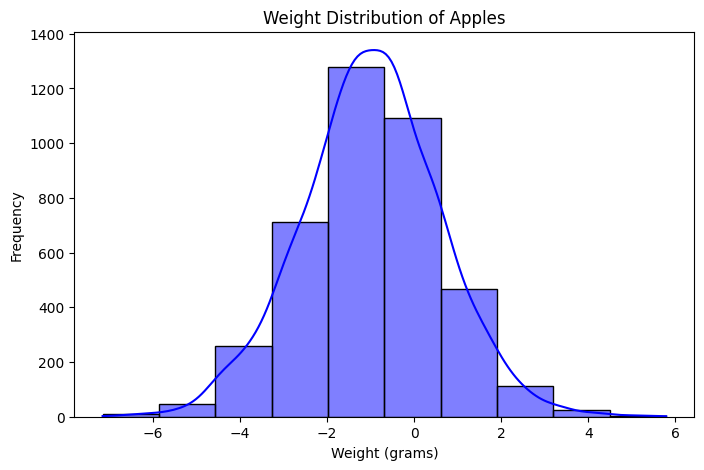

In [ ]:


# Histogram for weight distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Weight'], bins=10, kde=True, color='blue')
plt.title('Weight Distribution of Apples')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3424\2748472909.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Quality"], y=df["Size"], palette="Set2")


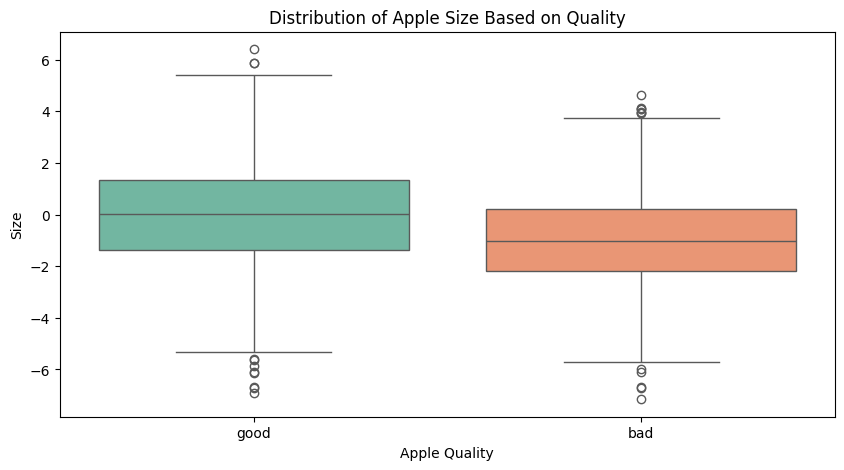

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10,5))

# Create a boxplot for size based on quality
sns.boxplot(x=df["Quality"], y=df["Size"], palette="Set2")

# Add labels and title
plt.xlabel("Apple Quality")
plt.ylabel("Size")
plt.title("Distribution of Apple Size Based on Quality")

# Show the plot
plt.show()


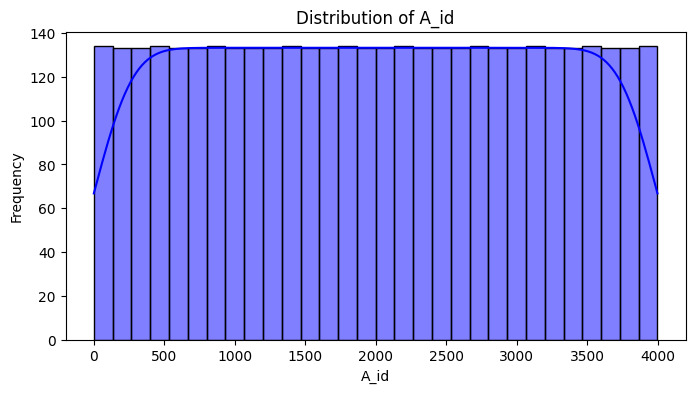

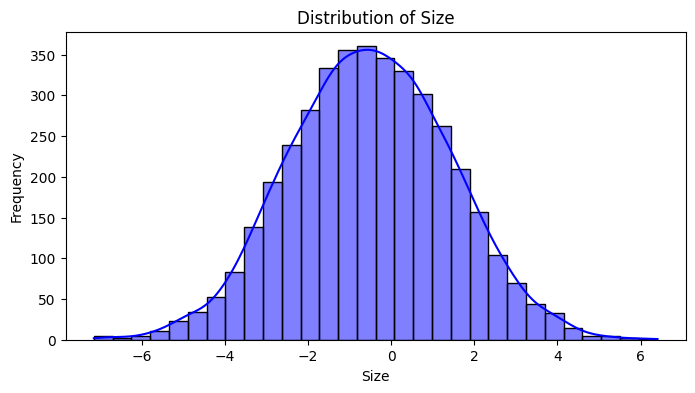

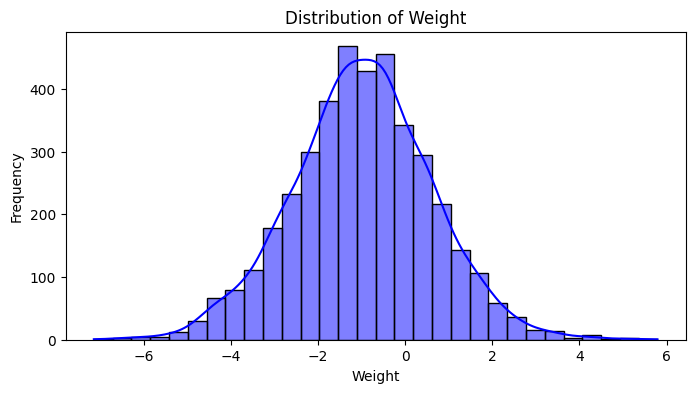

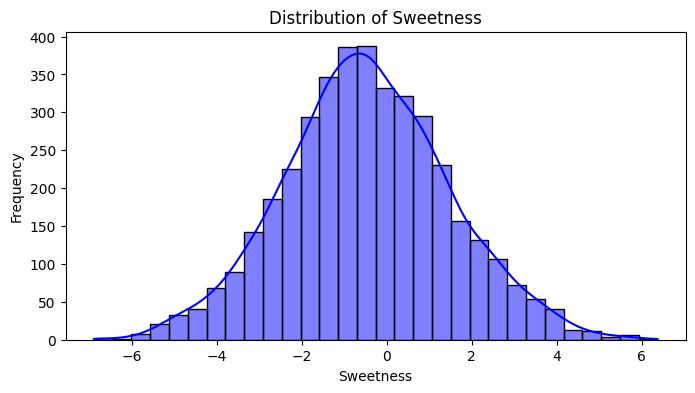

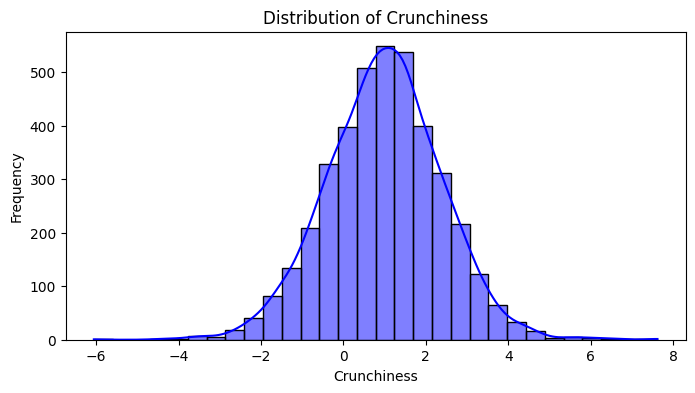

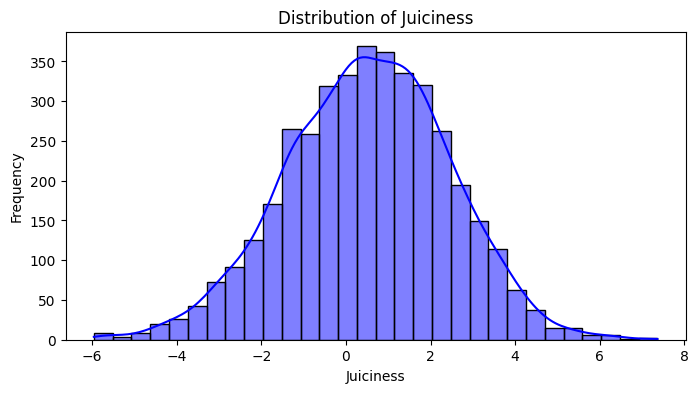

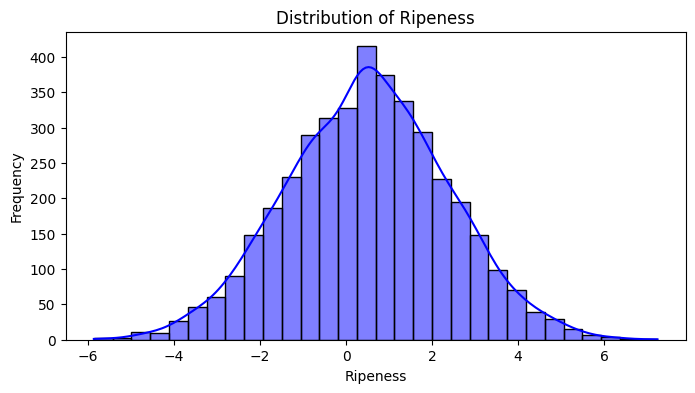

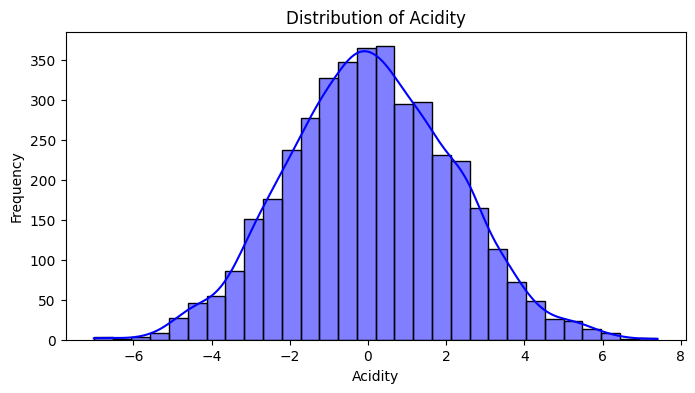

In [18]:
#Histogram for each numerical feature**
for column in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

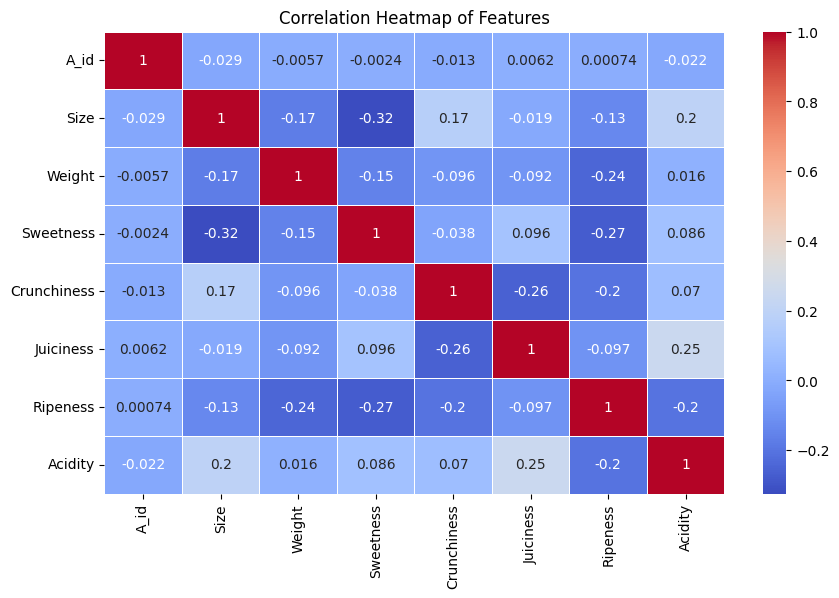

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

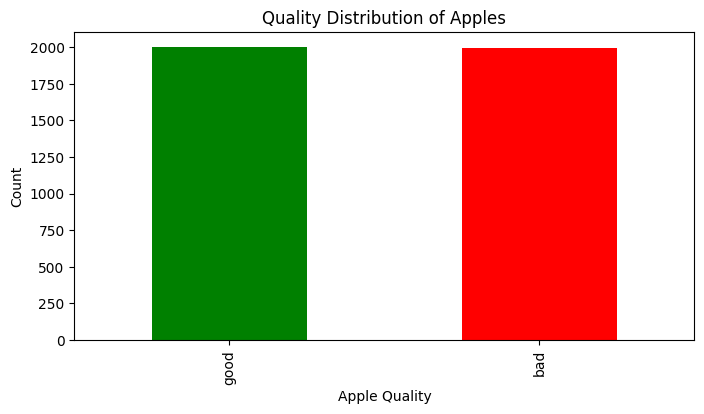

In [20]:
 # Bar plot for Quality Distribution
plt.figure(figsize=(8, 4))
df["Quality"].value_counts().plot(kind="bar", color=["green", "red"])
plt.xlabel("Apple Quality")
plt.ylabel("Count")
plt.title("Quality Distribution of Apples")
plt.show()